In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
from qiskit.circuit.library.standard_gates import RXGate, UGate, IGate
from qiskit.circuit import QuantumCircuit, Delay
from qiskit import transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService


import sys
import os

# Tenemos que agregar ".." a nuestro sys.path para usar SteaneCodeCircuit
sys.path.append(os.path.abspath(".."))
from objects.steane_code_circuit import SteaneCodeCircuit

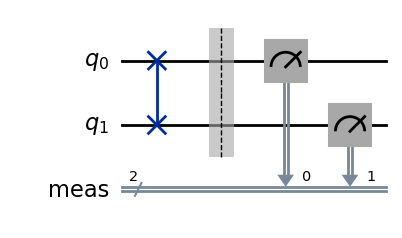

In [12]:
# Podemos crear un QuantumCircuit y simplemente agregar .id() a la compuerta:
qc = QuantumCircuit(2)
qc.swap(0, 1)
qc.measure_all()

qc.draw("mpl")

In [3]:
# Instanciamos el servicio
ibm_token = ""
service = QiskitRuntimeService(channel="ibm_quantum", token=ibm_token)

Profundidad del circuito transpilado: 14


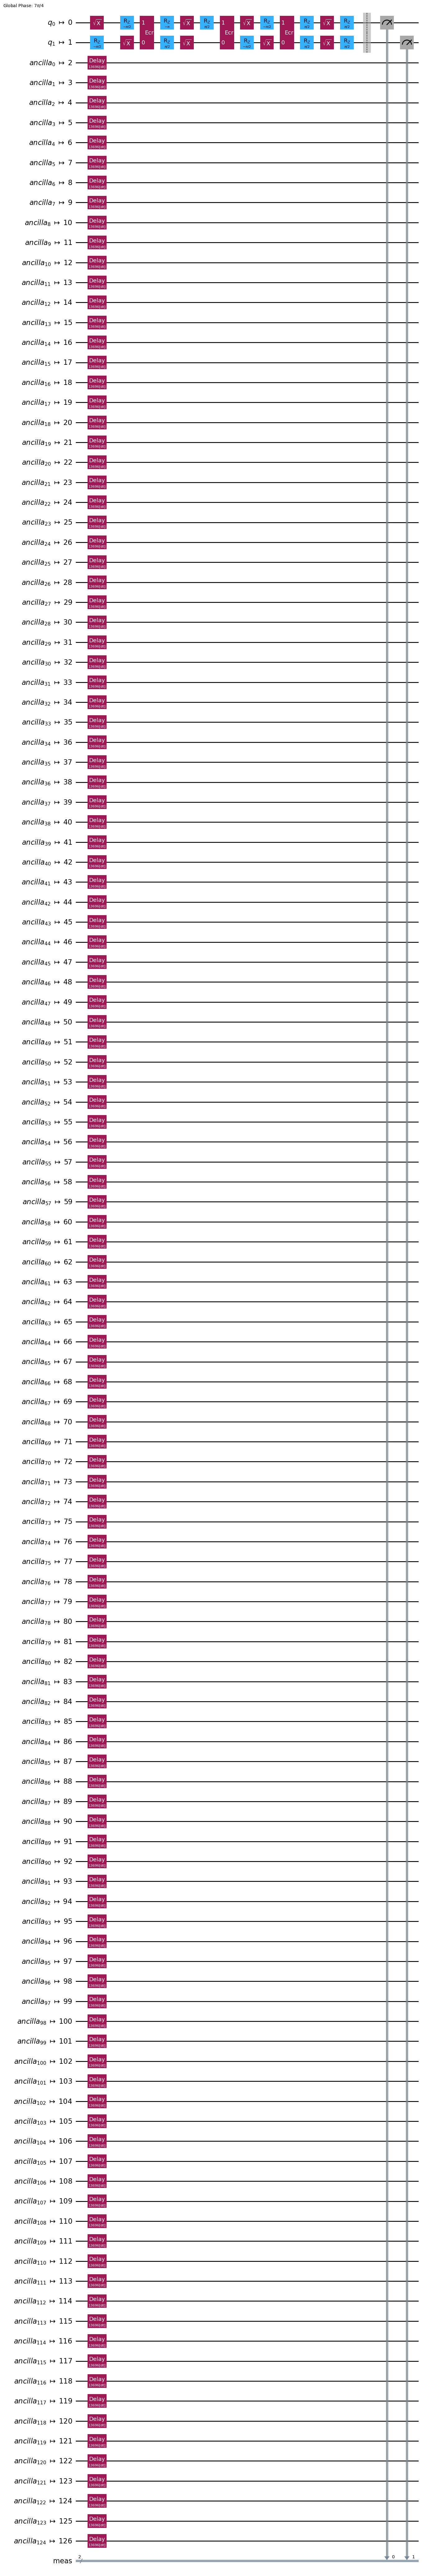

In [14]:
backend_name = 'ibm_sherbrooke'
backend = service.backend(backend_name)


# Transpilar el circuito
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_circuit = transpile(qc, backend, scheduling_method="asap", optimization_level=1)

print(f"Profundidad del circuito transpilado: {isa_circuit.depth()}")

isa_circuit.draw("mpl") # Imprimimos el circuito transpilado